In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lbg
from lightgbm import early_stopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
data=pd.read_csv('train.csv')
data=data.drop(['id','CustomerId'],axis=1)
test_data=pd.read_csv('test.csv')
test_id=test_data.id
test_data=test_data.drop(['id','CustomerId'],axis=1)
test_data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [3]:
data.shape

(165034, 12)

In [4]:
test_data.shape

(110023, 11)

In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
data.isnull().nunique()

Surname            1
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [7]:
 le=LabelEncoder()
def label_enc(x):    
    x.Surname=pd.DataFrame((le.fit_transform(x.Surname)))
    x.Surname=(x.Surname)/1000
    return x

In [8]:
data=label_enc(data)
test_data=label_enc(test_data)
test_data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.482,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,1.812,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,1.246,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,1.832,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,1.079,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,1.933,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,0.579,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,0.410,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,2.656,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
def encode_cat(train_data):
    cat_cols=train_data.select_dtypes(include=['object'])
    cat_cols_list=cat_cols.columns
    new_cat_cols=pd.get_dummies(cat_cols,dtype='int64',drop_first=False)
    train_data=pd.concat([train_data,new_cat_cols],axis=1)
    train_data=train_data.drop(cat_cols_list,axis=1)
    return train_data

In [11]:
X=encode_cat(X)
test_data=encode_cat(test_data)

In [12]:
X

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.924,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,1
1,1.925,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1
2,1.178,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,1
3,1.299,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1
4,0.467,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1.701,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1,1,0
165030,1.918,792,35.0,3,0.00,1,0.0,0.0,131834.45,1,0,0,0,1
165031,1.172,565,31.0,5,0.00,1,1.0,1.0,127429.56,1,0,0,0,1
165032,1.176,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1,1,0


In [13]:
test_data

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.482,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,1.812,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,1.246,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,1.832,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,1.079,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,1.933,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1
110019,0.579,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1,0
110020,0.410,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,1
110021,2.656,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1,0


# Feature Engineering

In [14]:
def min_max(train_data,col):
    min_value=train_data[col].min()
    max_value=train_data[col].max()
    train_data[col+'_scaled']=(train_data[col]-min_value)/(max_value-min_value)
    train_data=train_data.drop(col,axis=1)
    return train_data

In [15]:
col='NumOfProducts'
def enc_num(train_data,col):
    col_list=[]
    new_col=pd.get_dummies(train_data[col],dtype='float64')
    for c in new_col.columns:
        c=(col+"_"+str(c))
        col_list.append(c)
    new_col.columns=col_list
    train_data=pd.concat([train_data,new_col],axis=1)
    train_data=train_data.drop(col,axis=1)
    return train_data
    

In [16]:
X=enc_num(X,'NumOfProducts')
X


,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1.924,668,33.0,3,0.00,1.0,0.0,181449.97,1,0,0,0,1,0.0,1.0,0.0,0.0
1,1.925,627,33.0,1,0.00,1.0,1.0,49503.50,1,0,0,0,1,0.0,1.0,0.0,0.0
2,1.178,678,40.0,10,0.00,1.0,0.0,184866.69,1,0,0,0,1,0.0,1.0,0.0,0.0
3,1.299,581,34.0,2,148882.54,1.0,1.0,84560.88,1,0,0,0,1,1.0,0.0,0.0,0.0
4,0.467,716,33.0,5,0.00,1.0,1.0,15068.83,0,0,1,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1.701,667,33.0,2,0.00,1.0,1.0,131834.75,0,0,1,1,0,1.0,0.0,0.0,0.0
165030,1.918,792,35.0,3,0.00,0.0,0.0,131834.45,1,0,0,0,1,1.0,0.0,0.0,0.0
165031,1.172,565,31.0,5,0.00,1.0,1.0,127429.56,1,0,0,0,1,1.0,0.0,0.0,0.0
165032,1.176,554,30.0,7,161533.00,0.0,1.0,71173.03,0,0,1,1,0,1.0,0.0,0.0,0.0


In [17]:
test_data=enc_num(test_data,col)
test_data

,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1.482,586,23.0,2,0.00,0.0,1.0,160976.75,1,0,0,1,0,0.0,1.0,0.0,0.0
1,1.812,683,46.0,2,0.00,1.0,0.0,72549.27,1,0,0,1,0,1.0,0.0,0.0,0.0
2,1.246,656,34.0,7,0.00,1.0,0.0,138882.09,1,0,0,1,0,0.0,1.0,0.0,0.0
3,1.832,681,36.0,8,0.00,1.0,0.0,113931.57,1,0,0,0,1,1.0,0.0,0.0,0.0
4,1.079,752,38.0,10,121263.62,1.0,0.0,139431.00,0,1,0,0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,1.933,570,29.0,7,116099.82,1.0,1.0,148087.62,0,0,1,0,1,1.0,0.0,0.0,0.0
110019,0.579,575,36.0,4,178032.53,1.0,1.0,42181.68,1,0,0,1,0,1.0,0.0,0.0,0.0
110020,0.410,712,31.0,2,0.00,1.0,0.0,16287.38,1,0,0,0,1,0.0,1.0,0.0,0.0
110021,2.656,709,32.0,3,0.00,1.0,1.0,158816.58,1,0,0,1,0,1.0,0.0,0.0,0.0


In [18]:
def plot_dist(col):  
    fig=plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(X[col],color='green',bins=7)
    plt.subplot(1,2,2)
    stats.probplot(X[col],dist='norm',plot=plt)
    plt.tight_layout()
    plt.show()

In [19]:
#plot_dist('Balance')

In [20]:
def tenure(d):    
    Age_ten=((d.Age*d.Tenure)).round(decimals=2)
    d['Age_ten']=Age_ten
    return d

In [21]:
X=tenure(X)
test_data=tenure(test_data)

In [22]:
def plot_corr(train_data):
    corr=train_data.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr,cmap='crest',annot=True)

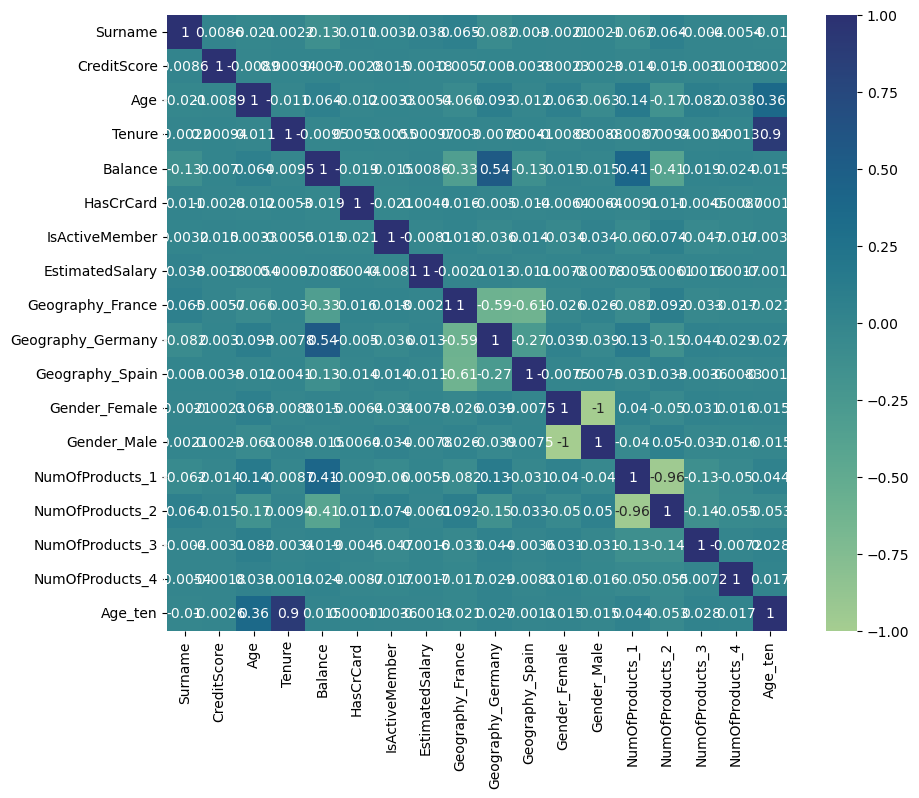

In [23]:
plot_corr(X)

In [24]:
def is_active_cred(d):
    Is_Active_cred=d.IsActiveMember*d.HasCrCard
    d['Is_Active_cred']=Is_Active_cred
    return d


In [25]:
X=is_active_cred(X)
test_data=is_active_cred(test_data)

In [26]:
def sur_geo(d):    
    sur_geo_gen_sal=d.Surname+d.Geography_Spain+d.Geography_Germany+d.Gender_Male+d.EstimatedSalary
    d['sur_geo_gen_sal']=sur_geo_gen_sal/100
    return d

In [27]:
X=sur_geo(X)
test_data=sur_geo(test_data)

In [28]:
def active_age(d):
    d['active_age']=(d.IsActiveMember*d.Age)/10
    return d
X=active_age(X)
test_data=active_age(test_data)

In [29]:
def is_senior(d):    
    d['IsSenior'] = (d['Age'].apply(lambda x: 1 if x >= 60 else 0))
    return d
X=is_senior(X)
test_data=is_senior(test_data)

In [30]:
test_data

,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_ten,Is_Active_cred,sur_geo_gen_sal,active_age,IsSenior
0,1.482,586,23.0,2,0.00,0.0,1.0,160976.75,1,0,...,0,0.0,1.0,0.0,0.0,46.0,0.0,1609.78232,2.3,0
1,1.812,683,46.0,2,0.00,1.0,0.0,72549.27,1,0,...,0,1.0,0.0,0.0,0.0,92.0,0.0,725.51082,0.0,0
2,1.246,656,34.0,7,0.00,1.0,0.0,138882.09,1,0,...,0,0.0,1.0,0.0,0.0,238.0,0.0,1388.83336,0.0,0
3,1.832,681,36.0,8,0.00,1.0,0.0,113931.57,1,0,...,1,1.0,0.0,0.0,0.0,288.0,0.0,1139.34402,0.0,0
4,1.079,752,38.0,10,121263.62,1.0,0.0,139431.00,0,1,...,1,1.0,0.0,0.0,0.0,380.0,0.0,1394.34079,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,1.933,570,29.0,7,116099.82,1.0,1.0,148087.62,0,0,...,1,1.0,0.0,0.0,0.0,203.0,1.0,1480.91553,2.9,0
110019,0.579,575,36.0,4,178032.53,1.0,1.0,42181.68,1,0,...,0,1.0,0.0,0.0,0.0,144.0,1.0,421.82259,3.6,0
110020,0.410,712,31.0,2,0.00,1.0,0.0,16287.38,1,0,...,1,0.0,1.0,0.0,0.0,62.0,0.0,162.88790,0.0,0
110021,2.656,709,32.0,3,0.00,1.0,1.0,158816.58,1,0,...,0,1.0,0.0,0.0,0.0,96.0,1.0,1588.19236,3.2,0


In [31]:
X

,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_ten,Is_Active_cred,sur_geo_gen_sal,active_age,IsSenior
0,1.924,668,33.0,3,0.00,1.0,0.0,181449.97,1,0,...,1,0.0,1.0,0.0,0.0,99.0,0.0,1814.52894,0.0,0
1,1.925,627,33.0,1,0.00,1.0,1.0,49503.50,1,0,...,1,0.0,1.0,0.0,0.0,33.0,1.0,495.06425,3.3,0
2,1.178,678,40.0,10,0.00,1.0,0.0,184866.69,1,0,...,1,0.0,1.0,0.0,0.0,400.0,0.0,1848.68868,0.0,0
3,1.299,581,34.0,2,148882.54,1.0,1.0,84560.88,1,0,...,1,1.0,0.0,0.0,0.0,68.0,1.0,845.63179,3.4,0
4,0.467,716,33.0,5,0.00,1.0,1.0,15068.83,0,0,...,1,0.0,1.0,0.0,0.0,165.0,1.0,150.71297,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1.701,667,33.0,2,0.00,1.0,1.0,131834.75,0,0,...,0,1.0,0.0,0.0,0.0,66.0,1.0,1318.37451,3.3,0
165030,1.918,792,35.0,3,0.00,0.0,0.0,131834.45,1,0,...,1,1.0,0.0,0.0,0.0,105.0,0.0,1318.37368,0.0,0
165031,1.172,565,31.0,5,0.00,1.0,1.0,127429.56,1,0,...,1,1.0,0.0,0.0,0.0,155.0,1.0,1274.31732,3.1,0
165032,1.176,554,30.0,7,161533.00,0.0,1.0,71173.03,0,0,...,0,1.0,0.0,0.0,0.0,210.0,0.0,711.75206,3.0,0


In [32]:
X=min_max(X,'Balance')
test_data=min_max(test_data,'Balance')

X=min_max(X,'CreditScore')
test_data=min_max(test_data,'CreditScore')

X=min_max(X,'EstimatedSalary')
test_data=min_max(test_data,'EstimatedSalary')

X=min_max(X,'Age')
test_data=min_max(test_data,'Age')

X=min_max(X,'sur_geo_gen_sal')
test_data=min_max(test_data,'sur_geo_gen_sal')

X=min_max(X,'Age_ten')
test_data=min_max(test_data,'Age_ten')


In [33]:
def mifc(train_data,test_data):
    mif=mutual_info_classif(train_data.select_dtypes(include=['int64','float64']),test_data)
    cols=(train_data.select_dtypes(include=['int64','float64'])).columns
    mifdf=pd.DataFrame()
    mifdf['Columns']=cols
    mifdf['Score']=mif
    mifdf=mifdf.sort_values(by='Score',ascending=False)
    plt.figure(figsize=(5,7))
    sns.barplot(mifdf,x=mifdf.Score,y=mifdf.Columns)
    plt.show()

In [34]:
X.describe()

,Surname,Tenure,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,...,NumOfProducts_4,Is_Active_cred,active_age,IsSenior,Balance_scaled,CreditScore_scaled,EstimatedSalary_scaled,Age_scaled,sur_geo_gen_sal_scaled,Age_ten_scaled
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,...,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.547282,5.020353,0.753954,0.497770,0.570882,0.209690,0.219428,0.435571,0.564429,0.468837,...,0.002878,0.370766,1.899265,0.028733,0.221118,0.612909,0.562870,0.271971,0.562869,0.224866
std,0.772771,2.806159,0.430707,0.499997,0.494952,0.407089,0.413860,0.495833,0.495833,0.499029,...,0.053572,0.483011,2.021005,0.167057,0.250371,0.160207,0.251488,0.119827,0.251485,0.139015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.494000,0.373166,0.189189,0.373173,0.110588
50%,1.589000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.618000,0.589738,0.256757,0.589733,0.211765
75%,2.186000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,3.700000,0.000000,0.478041,0.720000,0.775779,0.324324,0.775774,0.320000
max,2.796000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#X=label_enc(X,'Tenure')
#test=label_enc(test_data,'Tenure')

In [36]:
X

,Surname,Tenure,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,...,NumOfProducts_4,Is_Active_cred,active_age,IsSenior,Balance_scaled,CreditScore_scaled,EstimatedSalary_scaled,Age_scaled,sur_geo_gen_sal_scaled,Age_ten_scaled
0,1.924,3,1.0,0.0,1,0,0,0,1,0.0,...,0.0,0.0,0.0,0,0.000000,0.636,0.907279,0.202703,0.907274,0.116471
1,1.925,1,1.0,1.0,1,0,0,0,1,0.0,...,0.0,1.0,3.3,0,0.000000,0.554,0.247483,0.202703,0.247489,0.038824
2,1.178,10,1.0,0.0,1,0,0,0,1,0.0,...,0.0,0.0,0.0,0,0.000000,0.656,0.924364,0.297297,0.924356,0.470588
3,1.299,2,1.0,1.0,1,0,0,0,1,1.0,...,0.0,1.0,3.4,0,0.593398,0.462,0.422787,0.216216,0.422787,0.080000
4,0.467,5,1.0,1.0,0,0,1,0,1,0.0,...,0.0,1.0,3.3,0,0.000000,0.732,0.075293,0.202703,0.075299,0.194118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1.701,2,1.0,1.0,0,0,1,1,0,1.0,...,0.0,1.0,3.3,0,0.000000,0.634,0.659179,0.202703,0.659177,0.077647
165030,1.918,3,0.0,0.0,1,0,0,0,1,1.0,...,0.0,0.0,0.0,0,0.000000,0.884,0.659177,0.229730,0.659177,0.123529
165031,1.172,5,1.0,1.0,1,0,0,0,1,1.0,...,0.0,1.0,3.1,0,0.000000,0.430,0.637151,0.175676,0.637147,0.182353
165032,1.176,7,0.0,1.0,0,0,1,1,0,1.0,...,0.0,0.0,3.0,0,0.643819,0.408,0.355841,0.162162,0.355841,0.247059


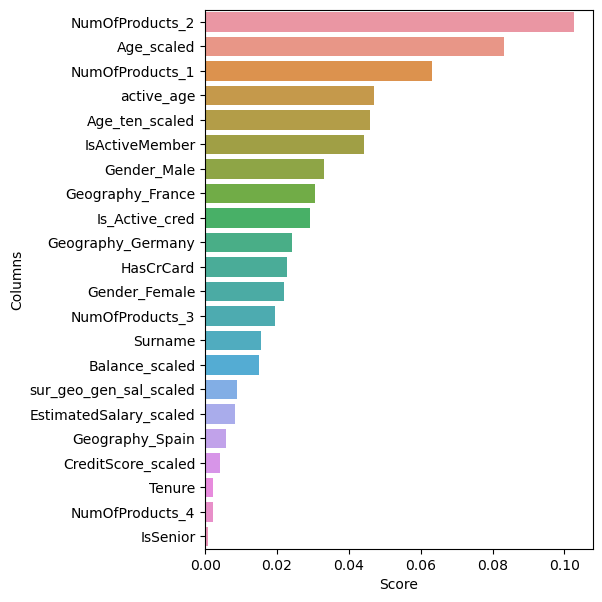

In [37]:
mifc(X,y)

In [38]:
#cols_to_drop=['NumOfProducts_4','IsSenior','NumOfProducts_4']
#=X.drop(cols_to_drop,axis=1)
#test_data=test_data.drop(cols_to_drop,axis=1)

In [39]:
#X=X.drop('Surname',axis=1)
#test_data=test_data.drop('Surname',axis=1)

In [40]:
n_folds=10
folds = StratifiedKFold(n_splits=n_folds,random_state=42,shuffle=True)
test_preds= np.empty((n_folds,len(test_data)))
auc_vals=[]

for n_folds, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    X_train, y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_test, y_test = X.iloc[valid_idx], y.iloc[valid_idx]
    
    lgbc=lbg.LGBMClassifier(boosting_type='gbdt',num_leaves=32,
                            learning_rate=0.01,n_estimators=5000,max_depth=23,min_child_weight=1.4)
    stopping_callback = early_stopping(stopping_rounds=200, verbose=200)
    lgbc.fit(X_train,y_train, eval_set=[(X_test,y_test)],
           eval_metric='auc',
           callbacks=[stopping_callback])
    
    y_pred=lgbc.predict_proba(X_test)[:,1]
    auc= roc_auc_score(y_test,y_pred)
    print("AUC for fold ",n_folds," : ",auc)
    auc_vals.append(auc)
    
    y_pred_test = lgbc.predict_proba(test_data)[:,1]
    test_preds[n_folds, :]=y_pred_test
    print("--------------------------------")

[LightGBM] [Info] Number of positive: 31429, number of negative: 117101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 148530, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211600 -> initscore=-1.315306
[LightGBM] [Info] Start training from score -1.315306
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1740]	valid_0's auc: 0.894374	valid_0's binary_logloss: 0.313948
AUC for fold  0  :  0.8943744412154223
--------------------------------
[LightGBM] [Info] Number of positive: 31429, number of negative: 117101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=t

KeyboardInterrupt: 

In [41]:
lgbm=lbg.LGBMClassifier(boosting_type='gbdt',num_leaves=32,learning_rate=0.01,n_estimators=5000,max_depth=30)
lgbm.fit(X,y)
y_pred=lgbm.predict_proba(X_test)[:,-1]
print(accuracy_score(y_test,y_pred))
lbg.plot_importance(lgbm,importance_type='gain')

[LightGBM] [Info] Number of positive: 34921, number of negative: 130113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 165034, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211599 -> initscore=-1.315315
[LightGBM] [Info] Start training from score -1.315315


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
np.mean(auc_vals[:-1])

In [ ]:
pd.DataFrame(test_preds).columns


In [ ]:
test_preds=pd.DataFrame(test_preds).drop([4],axis=0)

In [ ]:
preds=test_preds.mean(axis=0)
pd.DataFrame(preds)


In [ ]:
probdf=pd.DataFrame(preds)
probdf

In [ ]:
submission_df=pd.DataFrame()
submission_df['id']=test_id
submission_df['Exited']=probdf
submission_df

In [ ]:
submission_df = submission_df.drop_duplicates(subset='id', keep='first')  # 
submission_df.to_csv('LGBM_submission.csv', index=False)